<a href="https://colab.research.google.com/github/Jmarsaki/prof_prap2/blob/main/App_identificadora_de_ara%C3%B1as_venenosas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Aplicación para identificación de arañas venenosas

##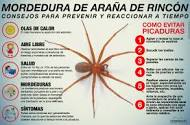

De las 750 especies de arañas que existen en Argentina, hay tres que representan interés sanitario debido a la peligrosidad de su veneno. Se trata de las especies loxosceles (conocida como araña de los cuadros o de los rincones o violinista), la latrodectus (viuda negra) y la phoneutria (araña del banano o armadeira), de incidencia menos frecuente en el territorio nacional. Tal como han advertido los especialistas, cada variedad de estos arácnidos presenta diferentes características respecto de los sitios donde habitan y sus picaduras demuestran señales disímiles, con afectaciones diferentes sobre el organismo.
Debido a este hecho, es util la realización de una aplicación que instalada en un dispositivo movil con cámara, pueda identificar al menos estos tres especímenes.

#Aplicación de filtro Gaussiano



#Preprocesamiento de imágenes

In [3]:
#Cambio de tamaño de imagen:

import cv2
from google.colab import files
uploaded = files.upload ()

def resize_image(image, width, height):
    resized_image = cv2.resize(image, (width, height))
    return resized_image

# Ejemplo de uso
image = cv2.imread('imagen.jpg')
resized_image = resize_image(image, 800, 600)
cv2.imshow('Resized Image', resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Saving arañas_venenosas.zip to arañas_venenosas (1).zip


error: ignored

In [2]:
!pwd

/content


In [4]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded["arañas_venenosas.zip"]),"r")
data = data.extractall()


#Aplicación de filtro Gaussiano

In [ ]:
#Aplicación de filtro Gaussiano:

import cv2

def apply_gaussian_blur(image, kernel_size):
    blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    return blurred_image

# Ejemplo de uso
image = cv2.imread('imagen.jpg')
blurred_image = apply_gaussian_blur(image, 5)
cv2.imshow('Blurred Image', blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#Conversión a diferentes espacios de color

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
image = cv2.imread('imagen.jpg', 0)

# Calcular el histograma
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Mostrar el histograma
plt.plot(histogram)
plt.title('Histograma de la imagen')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')
plt.show()


#Características de contorno utilizando el algoritmo de contorno de Canny en OpenCV en Python:

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
image = cv2.imread('imagen.jpg', 0)

# Aplicar el algoritmo de Canny para detectar los contornos
edges = cv2.Canny(image, 100, 200)

# Mostrar la imagen con los contornos detectados
plt.imshow(edges, cmap='gray')
plt.title('Contornos detectados')
plt.axis('off')
plt.show()


#Histograma de una imagen utilizando OpenCV en Python:

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
image = cv2.imread('imagen.jpg', 0)

# Calcular el histograma
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Mostrar el histograma
plt.plot(histogram)
plt.title('Histograma de la imagen')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')
plt.show()


En estos ejemplos, 'imagen.jpg' debe reemplazarse con la ruta de la imagen que se desee procesar. Los códigos muestran los resultados en ventanas de visualización y esperan a que se presione una tecla antes de cerrarse. Estos son solo ejemplos básicos y se pueden personalizar según las necesidades específicas, como ajustar los parámetros de los filtros, agregar más transformaciones, etc.

#Clasificación de imágenes utilizando redes neuronales convolucionales (CNN) con TensorFlow y Keras en Python:

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Cargar y preparar los datos de entrenamiento y prueba (ejemplo con MNIST)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# Definir el modelo de la red neuronal convolucional
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])

# Compilar y entrenar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


#Detección de objetos utilizando el framework de detección de objetos de TensorFlow en Python:

In [ ]:
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

# Cargar el modelo pre-entrenado y el archivo de etiquetas
model_path = 'path/al/modelo/frozen_inference_graph.pb'
label_map_path = 'path/al/archivo/de/etiquetas.pbtxt'

detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(model_path, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

label_map = label_map_util.load_labelmap(label_map_path)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=90, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Preparar la imagen de entrada
image = cv2.imread('imagen.jpg')
image_expanded = np.expand_dims(image, axis=0)

# Realizar la detección de objetos
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Obtener los tensores de entrada y salida
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')

        # Realizar la detección
        (boxes, scores, classes, num) = sess.run([detection_boxes, detection_scores, detection_classes, num_detections],
                                                 feed_dict={image_tensor: image_expanded})

        # Visualizar los resultados
        vis_util.visualize_boxes_and_labels_on_image_array(image, np.squeeze(boxes), np.squeeze(classes).astype(np.int32),
                                                           np.squeeze(scores), category_index, use_normalized_coordinates=True,
                                                           line_thickness=8)

        # Mostrar la imagen con los objetos detectados
        cv2.imshow('Detected Objects', image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()


#Interfaz gráfica de usuario utilizando Tkinter en Python:

In [ ]:
import tkinter as tk
from PIL import Image, ImageTk

def cargar_imagen():
    # Abrir una ventana de diálogo para seleccionar un archivo de imagen
    filepath = tk.filedialog.askopenfilename(filetypes=[('Imágenes', '*.jpg;*.png;*.jpeg')])

    # Cargar la imagen seleccionada
    image = Image.open(filepath)

    # Mostrar la imagen en el lienzo
    img_label.configure(image=image)
    img_label.image = image

def aplicar_tecnica():
    # Aplicar la técnica de procesamiento a la imagen

    # Mostrar los resultados en el lienzo
    ...

# Crear la ventana principal
window = tk.Tk()
window.title('Aplicación de Procesamiento de Imágenes')

# Crear un lienzo para mostrar la imagen
img_label = tk.Label(window)
img_label.pack()

# Crear un botón para cargar la imagen
load_button = tk.Button(window, text='Cargar Imagen', command=cargar_imagen)
load_button.pack()

# Crear un botón para aplicar la técnica de procesamiento
process_button = tk.Button(window, text='Aplicar Técnica', command=aplicar_tecnica)
process_button.pack()

# Ejecutar el bucle principal de la interfaz de usuario
window.mainloop()


Interfaz gráfica de usuario utilizando PyQt en Python:

In [ ]:
import sys
from PyQt5.QtWidgets import QApplication, QMainWindow, QLabel, QPushButton, QVBoxLayout, QWidget, QFileDialog
from PyQt5.QtGui import QPixmap

class MainWindow(QMainWindow):
    def __init__(self):
        super().__init__()
        self.setWindowTitle('Aplicación de Procesamiento de Imágenes')

        # Crear un lienzo para mostrar la imagen
        self.img_label = QLabel(self)
        self.img_label.setPixmap(QPixmap('default_image.png'))  # Imagen por defecto
        self.img_label.setScaledContents(True)

        # Crear un botón para cargar la imagen
        load_button = QPushButton('Cargar Imagen', self)
        load_button.clicked.connect(self.cargar_imagen)

        # Crear un botón para aplicar la técnica de procesamiento
        process_button = QPushButton('Aplicar Técnica', self)
        process_button.clicked.connect(self.aplicar_tecnica)

        # Crear un diseño vertical y agregar los elementos
        layout = QVBoxLayout()
        layout.addWidget(self.img_label)
        layout.addWidget(load_button)
        layout.addWidget(process_button)

        # Crear un widget central y establecer el diseño
        central_widget = QWidget()
        central_widget.setLayout(layout)
        self.setCentralWidget(central_widget)

    def cargar_imagen(self):
        # Abrir una ventana de diálogo para seleccionar un archivo de imagen
        filepath, _ = QFileDialog.getOpenFileName(self, 'Cargar Imagen', '', 'Imágenes (*.jpg *.png *.jpeg)')

        # Cargar la imagen seleccionada
        image = QPixmap(filepath)

        # Mostrar la imagen en el lienzo
        self.img_label.setPixmap(image)

    def aplicar_tecnica(self):
        # Aplicar la técnica de procesamiento a la imagen

        # Mostrar los resultados en el lienzo
        ...

if __name__ == '__main__':
    app = QApplication(sys.argv)
    window = MainWindow()
    window.show()
    sys.exit(app.exec_())
